<a href="https://colab.research.google.com/github/Alireza-Foroughi-uk/FraudGuard-ML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FraudGuard - Data Science and Machine Learning Project**

Project Include:

1-Import The Data Set

2-Load The Data Set

3-Data Cleaning

4-Data Wrangling

5-Statistical Analysis

6-Data Visualization

7-Feature Engineering

8-Modeling (Machine Learning)

**DataSet Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud**

**1- Import The Data Set**

In [ ]:
!pip install mlcroissant
import mlcroissant as mlc
import itertools

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Set the path to the file you'd like to load
# The file_path should be set to the name of the available record set
file_path = "creditcard.csv"  # Changed to the correct record set name

# Fetch the records
record_set = croissant_dataset.records(record_set=file_path)
print("First 5 records:",
  list(itertools.islice(record_set, 5))
)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 24.1 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=0bfe5bb8ff5877e094244a741b6353769b5434b9bbb45da3d69890535578b9cc
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw


  -  [Metadata(Credit Card Fraud Detection)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="creditcard.csv")]


First 5 records: [{'creditcard.csv/Time': 0, 'creditcard.csv/V1': -1.3598071336738, 'creditcard.csv/V2': -0.0727811733098497, 'creditcard.csv/V3': 2.53634673796914, 'creditcard.csv/V4': 1.37815522427443, 'creditcard.csv/V5': -0.338320769942518, 'creditcard.csv/V6': 0.462387777762292, 'creditcard.csv/V7': 0.239598554061257, 'creditcard.csv/V8': 0.0986979012610507, 'creditcard.csv/V9': 0.363786969611213, 'creditcard.csv/V10': 0.0907941719789316, 'creditcard.csv/V11': -0.551599533260813, 'creditcard.csv/V12': -0.617800855762348, 'creditcard.csv/V13': -0.991389847235408, 'creditcard.csv/V14': -0.311169353699879, 'creditcard.csv/V15': 1.46817697209427, 'creditcard.csv/V16': -0.470400525259478, 'creditcard.csv/V17': 0.207971241929242, 'creditcard.csv/V18': 0.0257905801985591, 'creditcard.csv/V19': 0.403992960255733, 'creditcard.csv/V20': 0.251412098239705, 'creditcard.csv/V21': -0.018306777944153, 'creditcard.csv/V22': 0.277837575558899, 'creditcard.csv/V23': -0.110473910188767, 'creditcard.

**2- Load The Data Set**

In [ ]:
import mlcroissant as mlc
import itertools
import pandas as pd

df1 = pd.DataFrame(list(record_set))

df1.head(5)

,creditcard.csv/Time,creditcard.csv/V1,creditcard.csv/V2,creditcard.csv/V3,creditcard.csv/V4,creditcard.csv/V5,creditcard.csv/V6,creditcard.csv/V7,creditcard.csv/V8,creditcard.csv/V9,...,creditcard.csv/V21,creditcard.csv/V22,creditcard.csv/V23,creditcard.csv/V24,creditcard.csv/V25,creditcard.csv/V26,creditcard.csv/V27,creditcard.csv/V28,creditcard.csv/Amount,creditcard.csv/Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**3- Data Cleaning**

*   Checking for missing values.
*   Handling duplicates.

Saving the cleaned dataset for future steps.

In [ ]:
import pandas as pd
import os

# Replace 'df' with 'df1' to use the DataFrame created earlier
df = df1

## Check for missing values
print("Missing Values:\n", df.isna().sum())

## Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())

## Remove duplicates (if any)
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

## Check data types
print("\nData Types:\n", df.dtypes)

## Subset the data for efficiency (optional, recommended for junior students)
# We'll use a sample of 10,000 rows to make computations faster
df_cleaned = df.sample(n=10000, random_state=42)
print("\nShape of Sampled Data:", df_cleaned.shape)

## Save the cleaned dataset
output_dir = "../data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Save the cleaned dataset
output_path = os.path.join(output_dir, "creditcard_cleaned.csv")
df_cleaned.to_csv(output_path, index=False)
print(f"Cleaned dataset saved as '{output_path}'")

Missing Values:
 creditcard.csv/Time      0
creditcard.csv/V1        0
creditcard.csv/V2        0
creditcard.csv/V3        0
creditcard.csv/V4        0
creditcard.csv/V5        0
creditcard.csv/V6        0
creditcard.csv/V7        0
creditcard.csv/V8        0
creditcard.csv/V9        0
creditcard.csv/V10       0
creditcard.csv/V11       0
creditcard.csv/V12       0
creditcard.csv/V13       0
creditcard.csv/V14       0
creditcard.csv/V15       0
creditcard.csv/V16       0
creditcard.csv/V17       0
creditcard.csv/V18       0
creditcard.csv/V19       0
creditcard.csv/V20       0
creditcard.csv/V21       0
creditcard.csv/V22       0
creditcard.csv/V23       0
creditcard.csv/V24       0
creditcard.csv/V25       0
creditcard.csv/V26       0
creditcard.csv/V27       0
creditcard.csv/V28       0
creditcard.csv/Amount    0
creditcard.csv/Class     0
dtype: int64

Number of Duplicates: 0
Shape after removing duplicates: (283726, 31)

Data Types:
 creditcard.csv/Time        int64
creditcard.csv/

**4- Data Wrangling**


*   Scaling Features
*   Handling Class Imbalance

Saving the Wrangled Dataset: Save the processed data for the next steps (statistical analysis, visualization, modeling).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import os

# Load the cleaned dataset
df_cleaned = pd.read_csv("../data/creditcard_cleaned.csv")
print("Loaded Cleaned Dataset Shape:", df_cleaned.shape)


print("Available Columns:", df_cleaned.columns)

## Feature Scaling
# 'V1-V28' are already PCA-transformed, so we only scale 'creditcard.csv/Time' and 'creditcard.csv/Amount'
scaler = StandardScaler()
df_cleaned[['creditcard.csv/Time', 'creditcard.csv/Amount']] = scaler.fit_transform(
    df_cleaned[['creditcard.csv/Time', 'creditcard.csv/Amount']]
)
print("\nData after scaling 'creditcard.csv/Time' and 'creditcard.csv/Amount':\n",
      df_cleaned[['creditcard.csv/Time', 'creditcard.csv/Amount']].head())

## Handle Class Imbalance using SMOTE
# Separate features and target
X = df_cleaned.drop('creditcard.csv/Class', axis=1)
y = df_cleaned['creditcard.csv/Class']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled
print("\nShape after SMOTE:", df_resampled.shape)
print("Class Distribution after SMOTE:\n", df_resampled['Class'].value_counts())

## Save the wrangled dataset
# Ensure the 'data' directory exists
output_dir = "../data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the wrangled dataset
output_path = os.path.join(output_dir, "creditcard_wrangled.csv")
df_resampled.to_csv(output_path, index=False)
print(f"Wrangled dataset saved as '{output_path}'")

Loaded Cleaned Dataset Shape: (10000, 31)
Available Columns: Index(['creditcard.csv/Time', 'creditcard.csv/V1', 'creditcard.csv/V2',
       'creditcard.csv/V3', 'creditcard.csv/V4', 'creditcard.csv/V5',
       'creditcard.csv/V6', 'creditcard.csv/V7', 'creditcard.csv/V8',
       'creditcard.csv/V9', 'creditcard.csv/V10', 'creditcard.csv/V11',
       'creditcard.csv/V12', 'creditcard.csv/V13', 'creditcard.csv/V14',
       'creditcard.csv/V15', 'creditcard.csv/V16', 'creditcard.csv/V17',
       'creditcard.csv/V18', 'creditcard.csv/V19', 'creditcard.csv/V20',
       'creditcard.csv/V21', 'creditcard.csv/V22', 'creditcard.csv/V23',
       'creditcard.csv/V24', 'creditcard.csv/V25', 'creditcard.csv/V26',
       'creditcard.csv/V27', 'creditcard.csv/V28', 'creditcard.csv/Amount',
       'creditcard.csv/Class'],
      dtype='object')

Data after scaling 'creditcard.csv/Time' and 'creditcard.csv/Amount':
    creditcard.csv/Time  creditcard.csv/Amount
0            -0.550022              -0.135

**5- Statistical Analysis**

1-Summary Statistics: Detailed stats for all features.

2-Class Distribution: Confirm the balance achieved by SMOTE.

3-Correlation Analysis: Examine relationships between features.

4-Feature Distributions: Analyze key features’ distributions.

5-Saving Insights: Save results for the IEEE paper

In [ ]:
import pandas as pd

# Load the wrangled dataset
df_wrangled = pd.read_csv("../data/creditcard_wrangled.csv")
print("Column Names in Wrangled Dataset:", df_wrangled.columns)

Column Names in Wrangled Dataset: Index(['creditcard.csv/Time', 'creditcard.csv/V1', 'creditcard.csv/V2',
       'creditcard.csv/V3', 'creditcard.csv/V4', 'creditcard.csv/V5',
       'creditcard.csv/V6', 'creditcard.csv/V7', 'creditcard.csv/V8',
       'creditcard.csv/V9', 'creditcard.csv/V10', 'creditcard.csv/V11',
       'creditcard.csv/V12', 'creditcard.csv/V13', 'creditcard.csv/V14',
       'creditcard.csv/V15', 'creditcard.csv/V16', 'creditcard.csv/V17',
       'creditcard.csv/V18', 'creditcard.csv/V19', 'creditcard.csv/V20',
       'creditcard.csv/V21', 'creditcard.csv/V22', 'creditcard.csv/V23',
       'creditcard.csv/V24', 'creditcard.csv/V25', 'creditcard.csv/V26',
       'creditcard.csv/V27', 'creditcard.csv/V28', 'creditcard.csv/Amount',
       'Class'],
      dtype='object')


Loaded Wrangled Dataset Shape: (19968, 31)
Cleaned Column Names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  19968.000000  19968.000000  19968.000000  19968.000000  19968.000000   
mean       0.002967     -1.299115      1.192371     -2.447980      1.748044   
std        0.898368      3.681338      2.677268      4.420976      2.582634   
min       -2.010049    -40.470142    -38.436817    -31.103685     -4.811194   
25%       -0.756090     -2.001038     -0.187179     -3.892166     -0.065411   
50%       -0.014939     -0.824450      0.982557     -1.243241      1.142992   
75%        0.803338      0.602255      1.892280      0.184980      3.239388   
max        1.635

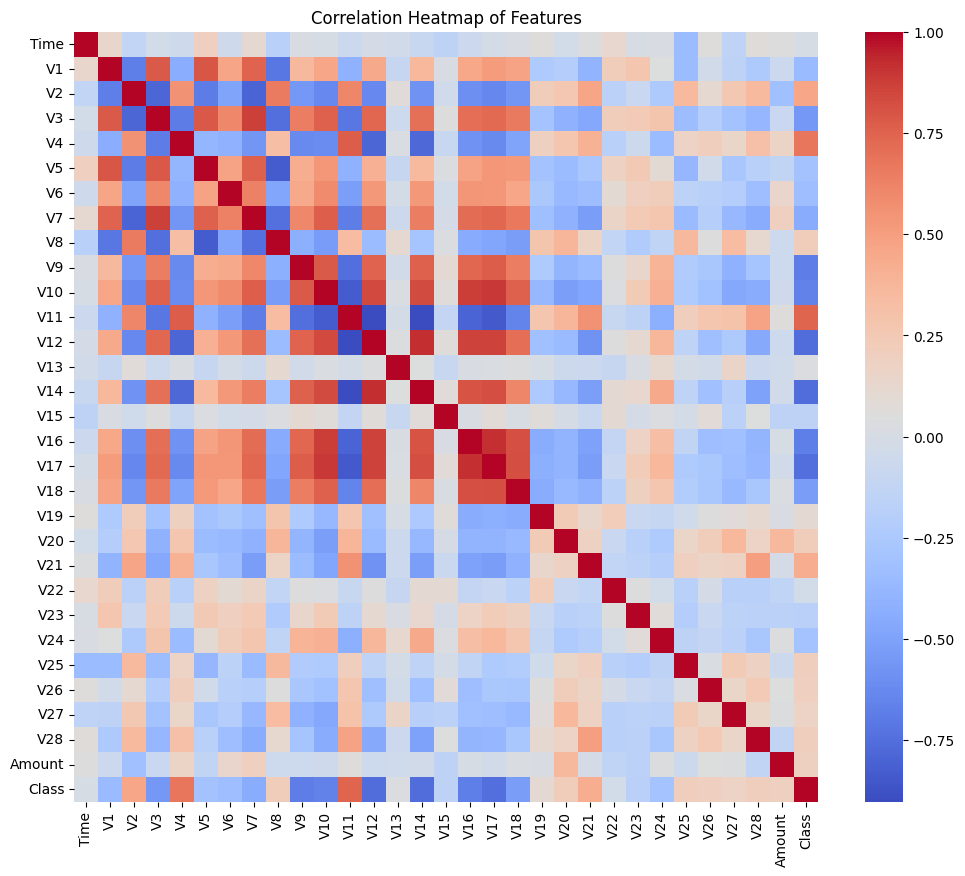

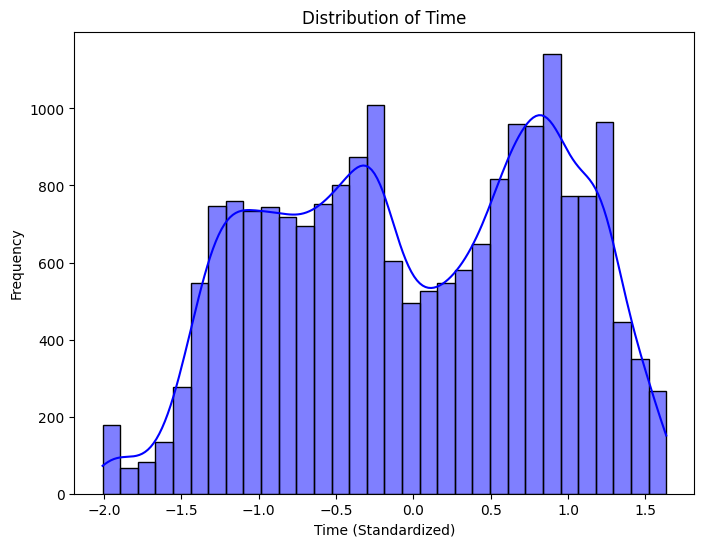

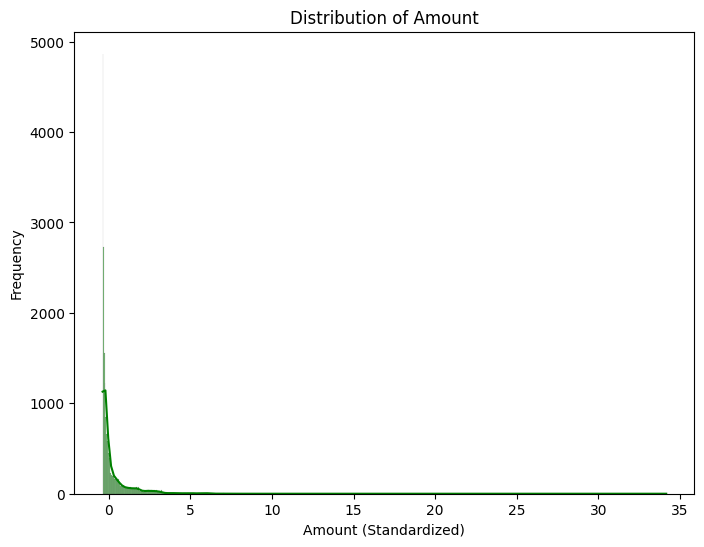

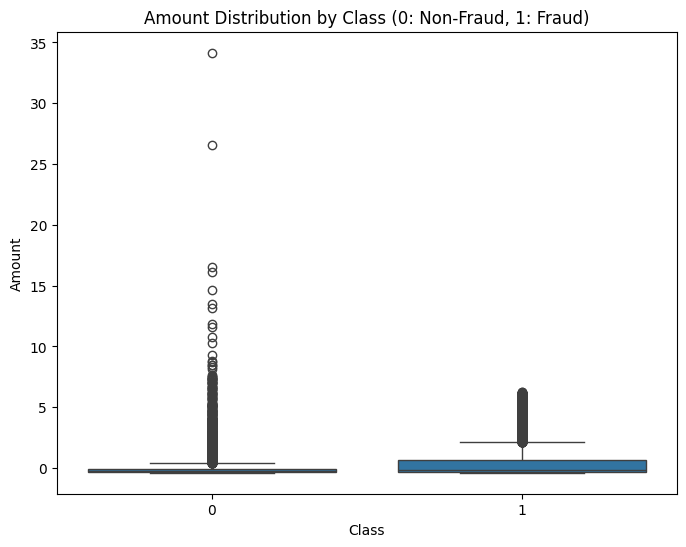

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the wrangled dataset
df_wrangled = pd.read_csv("../data/creditcard_wrangled.csv")
print("Loaded Wrangled Dataset Shape:", df_wrangled.shape)

# Clean column names by removing 'creditcard.csv/' prefix (if present)
df_wrangled.columns = [col.replace('creditcard.csv/', '') for col in df_wrangled.columns]
print("Cleaned Column Names:", df_wrangled.columns)

## Summary Statistics
print("\nSummary Statistics:\n", df_wrangled.describe())

## Class Distribution (already balanced by SMOTE, confirming here)
print("\nClass Distribution:\n", df_wrangled['Class'].value_counts(normalize=True))

## Correlation Analysis
# Compute correlation matrix
corr_matrix = df_wrangled.corr()

# Ensure the 'results' directory exists
results_dir = "../results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    print(f"Created directory: {results_dir}")

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.savefig(os.path.join(results_dir, "correlation_heatmap.png"))
plt.show()

## Distribution of Key Features
# Distribution of 'Time'
plt.figure(figsize=(8, 6))
sns.histplot(df_wrangled['Time'], kde=True, color='blue')
plt.title("Distribution of Time")
plt.xlabel("Time (Standardized)")
plt.ylabel("Frequency")
plt.savefig(os.path.join(results_dir, "time_distribution.png"))
plt.show()

# Distribution of 'Amount'
plt.figure(figsize=(8, 6))
sns.histplot(df_wrangled['Amount'], kde=True, color='green')
plt.title("Distribution of Amount")
plt.xlabel("Amount (Standardized)")
plt.ylabel("Frequency")
plt.savefig(os.path.join(results_dir, "amount_distribution.png"))
plt.show()

## Compare Amount by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df_wrangled)
plt.title("Amount Distribution by Class (0: Non-Fraud, 1: Fraud)")
plt.savefig(os.path.join(results_dir, "amount_by_class.png"))
plt.show()

**6-Data Visualization**

1-Scatter Plot: Time vs. Amount, colored by Class

2-Pair Plot: Relationships between a subset of features (Time, Amount, V1, V2), colored by Class.

3-Violin Plot: Distribution of V1 by Class to compare fraud vs. non-fraud.

4-Box Plot: Distribution of V2 by Class to identify differences.

5-Count Plot: Class distribution to visualize the balance achieved by SMOTE.

Loaded Wrangled Dataset Shape: (19968, 31)
Cleaned Column Names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


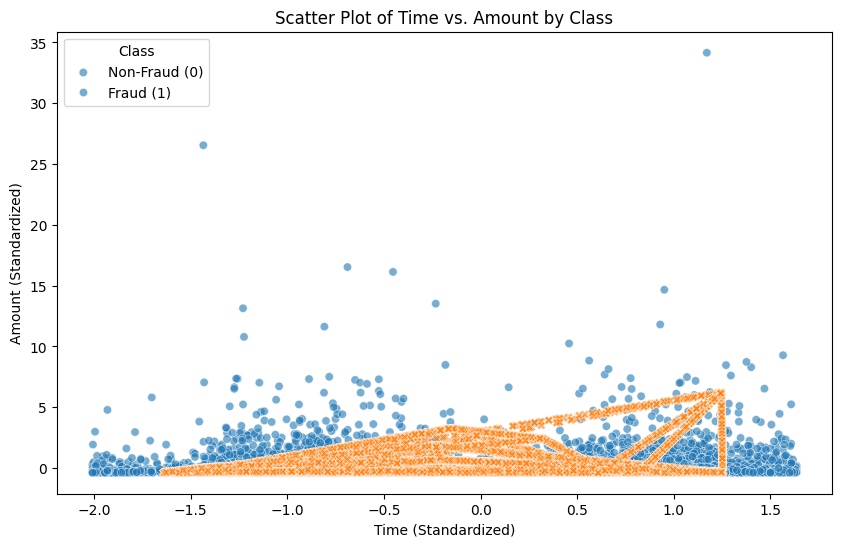

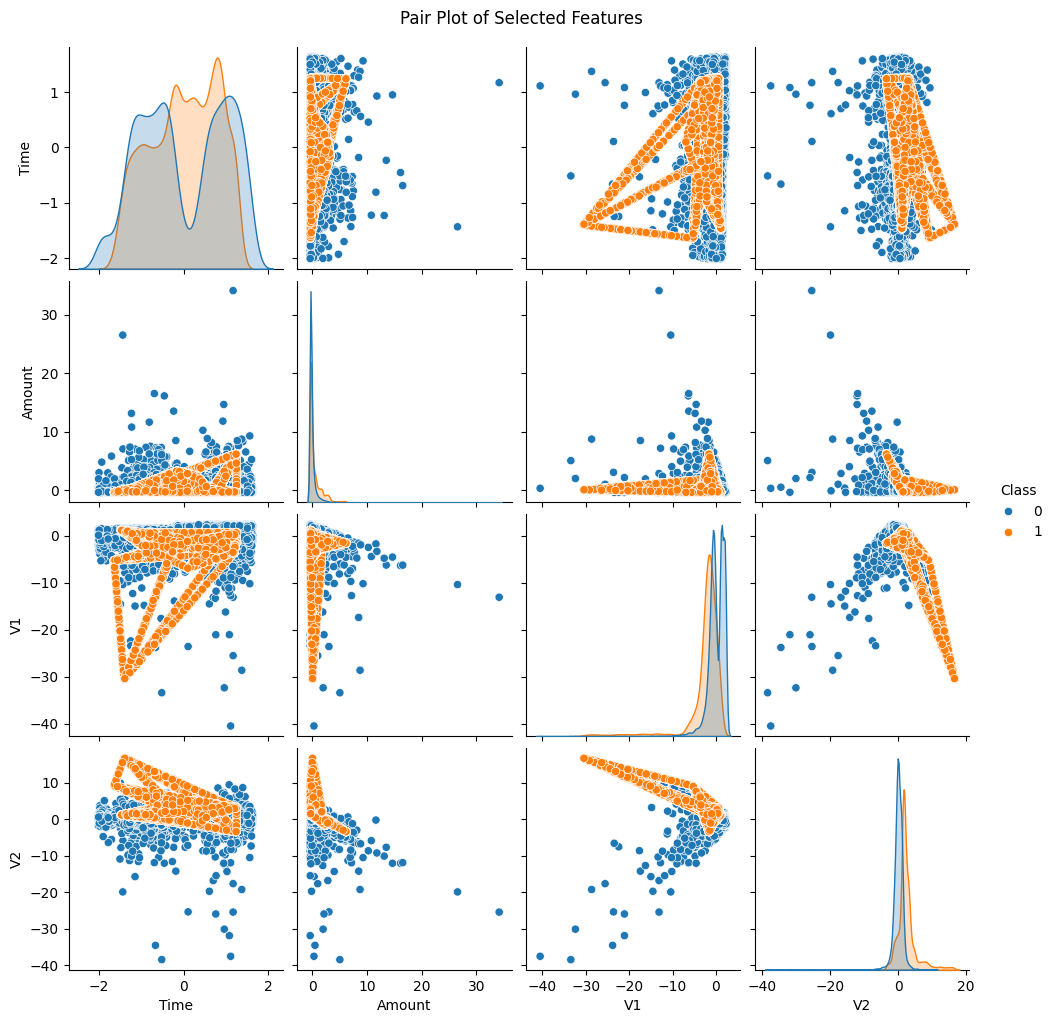

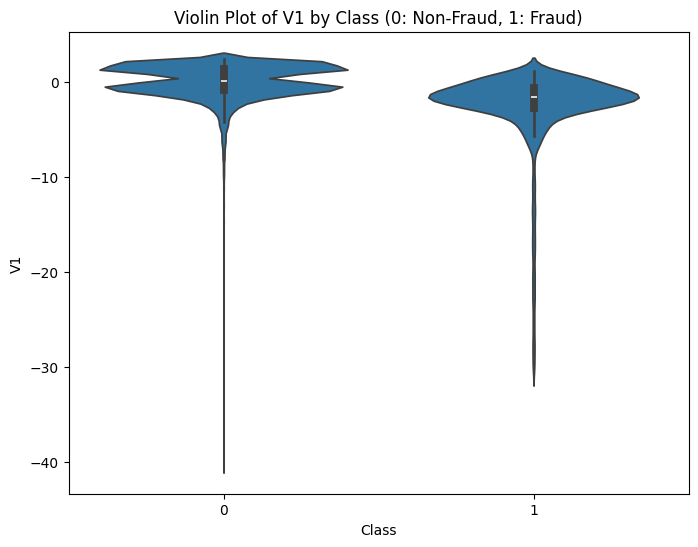

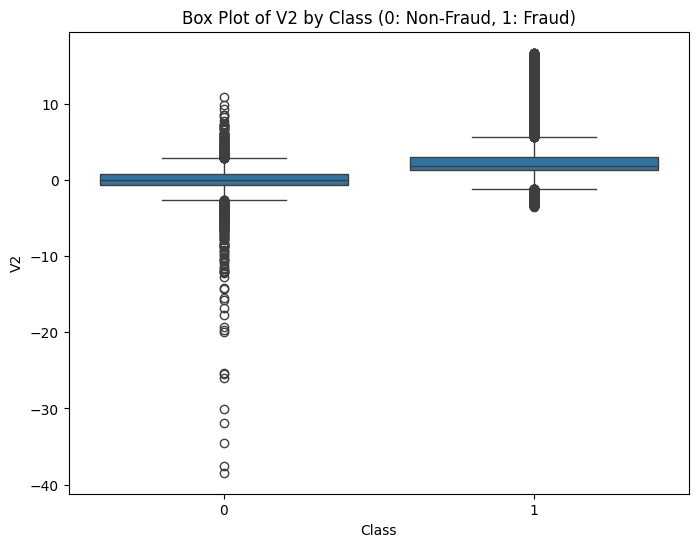

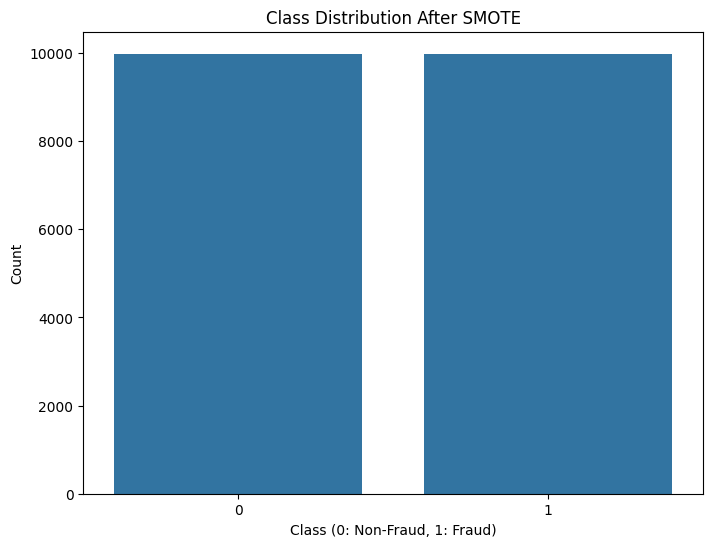

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the wrangled dataset
df_wrangled = pd.read_csv("../data/creditcard_wrangled.csv")
print("Loaded Wrangled Dataset Shape:", df_wrangled.shape)

# Clean column names by removing 'creditcard.csv/' prefix (if present)
df_wrangled.columns = [col.replace('creditcard.csv/', '') for col in df_wrangled.columns]
print("Cleaned Column Names:", df_wrangled.columns)

# Ensure the 'results' directory exists
results_dir = "../results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    print(f"Created directory: {results_dir}")

## Visualization 1: Scatter Plot of Time vs. Amount, colored by Class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', style='Class', data=df_wrangled, alpha=0.6)
plt.title("Scatter Plot of Time vs. Amount by Class")
plt.xlabel("Time (Standardized)")
plt.ylabel("Amount (Standardized)")
plt.legend(title='Class', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.savefig(os.path.join(results_dir, "time_vs_amount_scatter.png"))
plt.show()

## Visualization 2: Pair Plot of Selected Features
# Select a subset of features to avoid clutter
subset_features = ['Time', 'Amount', 'V1', 'V2', 'Class']
sns.pairplot(df_wrangled[subset_features], hue='Class', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.savefig(os.path.join(results_dir, "pair_plot_selected_features.png"))
plt.show()

## Visualization 3: Violin Plot of V1 by Class
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='V1', data=df_wrangled)
plt.title("Violin Plot of V1 by Class (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("V1")
plt.savefig(os.path.join(results_dir, "v1_by_class_violin.png"))
plt.show()

## Visualization 4: Box Plot of V2 by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='V2', data=df_wrangled)
plt.title("Box Plot of V2 by Class (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("V2")
plt.savefig(os.path.join(results_dir, "v2_by_class_box.png"))
plt.show()

## Visualization 5: Count Plot of Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_wrangled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.savefig(os.path.join(results_dir, "class_distribution.png"))
plt.show()

**7-Feature Engineering**

1-Creating New Features: Derive features from Time
(e.g., time bins to capture patterns like fraud occurring at certain times of the day).

2-Feature Selection: Use a simple method (e.g., correlation with Class or a tree-based model) to identify the most important features.:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import os

# Load the wrangled dataset
df_wrangled = pd.read_csv("../data/creditcard_wrangled.csv")
print("Loaded Wrangled Dataset Shape:", df_wrangled.shape)

# Ensure column names are clean (remove 'creditcard.csv/' prefix if present)
df_wrangled.columns = [col.replace('creditcard.csv/', '') for col in df_wrangled.columns]
print("Column Names:", df_wrangled.columns)

## Feature Creation: Time Bins
# Since 'Time' is standardized, let's first reverse the scaling to interpret it
# In the original dataset, 'Time' is in seconds; let's approximate the scaling
# Note: We don't have the original scaler, so we'll bin the standardized 'Time' directly
# Create bins for standardized 'Time' (e.g., 4 bins to approximate quarters of the time range)
df_wrangled['Time_Bin'] = pd.qcut(df_wrangled['Time'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
# One-hot encode the time bins
df_wrangled = pd.get_dummies(df_wrangled, columns=['Time_Bin'], prefix='Time_Bin')
print("\nShape after adding Time Bins:", df_wrangled.shape)

## Feature Selection: Use Random Forest to identify important features
# Separate features and target
X = df_wrangled.drop('Class', axis=1)
y = df_wrangled['Class']

# Train a Random Forest model to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", importances)

# Select the top 15 features (arbitrary choice; adjust based on your needs)
top_features = importances['Feature'].head(15).tolist()
print("\nTop 15 Features Selected:\n", top_features)

# Create a new DataFrame with the selected features and the target
df_engineered = df_wrangled[top_features + ['Class']]
print("\nShape of Engineered Dataset:", df_engineered.shape)

## Save the engineered dataset
# Ensure the 'data' directory exists
output_dir = "../data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the engineered dataset
output_path = os.path.join(output_dir, "creditcard_engineered.csv")
df_engineered.to_csv(output_path, index=False)
print(f"Engineered dataset saved as '{output_path}'")

Loaded Wrangled Dataset Shape: (19968, 31)
Column Names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Shape after adding Time Bins: (19968, 35)

Feature Importances:
         Feature  Importance
17          V17    0.162461
12          V12    0.147984
11          V11    0.104312
14          V14    0.103029
16          V16    0.077039
4            V4    0.064828
10          V10    0.057973
3            V3    0.057645
7            V7    0.048721
21          V21    0.028938
9            V9    0.027666
28          V28    0.026637
2            V2    0.016764
29       Amount    0.013281
8            V8    0.009971
1            V1    0.005624
22          V22    0.004877
27          V27    0.004710
19          V19    0.004500
0          Time    0.004271
5            V5    0.004